# Filtering using FFT and IFFT

## E/20/420 : WANASINGHE J.K.


### Necessary Imports

In [ ]:
#Importing Google Drive Content

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install numpy scipy matplotlib sounddevice pandas

In [ ]:
!apt-get install libportaudio2

In [ ]:
import numpy as np
import scipy.fftpack as scipy_fft
from scipy import signal
import matplotlib.pyplot as plt
import timeit
import pandas as pd
import sounddevice as sd
from IPython.display import Audio, display
import warnings
warnings.filterwarnings('ignore')

# Set up matplotlib for inline plotting
%matplotlib inline
plt.style.use('default')


### 1. Generate three sinusoids with frequencies 2 Hz, 5 Hz, and 9 Hz, with amplitudes 4, 3 and 0.5, and zero phases. Add these 3 waves together with a sampling rate 2000 Hz. Final sequence should be for a time period of 0 to 1 s. Plot the signal against time.

In [ ]:
# Parameters
fs = 2000  # Sampling rate (Hz)
duration = 1  # Duration (seconds)
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Generate three sinusoids with specified parameters
freq1, freq2, freq3 = 2, 5, 9  # Frequencies (Hz)
amp1, amp2, amp3 = 4, 3, 0.5   # Amplitudes
phase1, phase2, phase3 = 0, 0, 0  # Phases (radians)

# Create individual sinusoids
sin1 = amp1 * np.sin(2 * np.pi * freq1 * t + phase1)
sin2 = amp2 * np.sin(2 * np.pi * freq2 * t + phase2)
sin3 = amp3 * np.sin(2 * np.pi * freq3 * t + phase3)

# Combine the signals
combined_signal = sin1 + sin2 + sin3

print(f"Signal length: {len(combined_signal)} samples")
print(f"Sampling rate: {fs} Hz")
print(f"Duration: {duration} seconds")


Signal length: 2000 samples
Sampling rate: 2000 Hz
Duration: 1 seconds


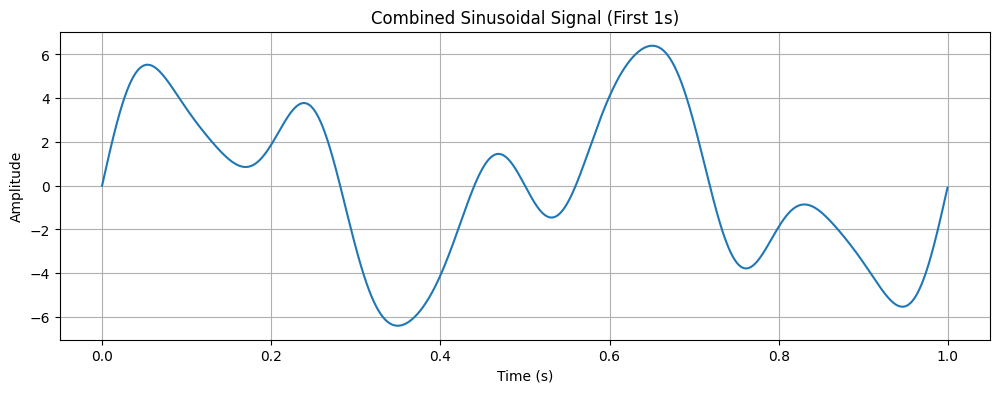

In [ ]:
# Plot the combined signal
plt.figure(figsize=(12, 4))
plt.plot(t[:2000], combined_signal[:2000])  # Show first 2000 samples for clarity
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Combined Sinusoidal Signal (First 1s)')
plt.grid(True)
plt.show()


### 2. Use fft and ifft function from numpy to calculate the FFT amplitude spectrum and inverse FFT to obtain the original signal. Plot both results (use stem function). Time the fft function using this 2000 length signal.  To obtain the frequencies you may use fftfreq function from the numpy.fft. Use timeit package for timing.

Average Numpy FFT time: 0.000032 seconds


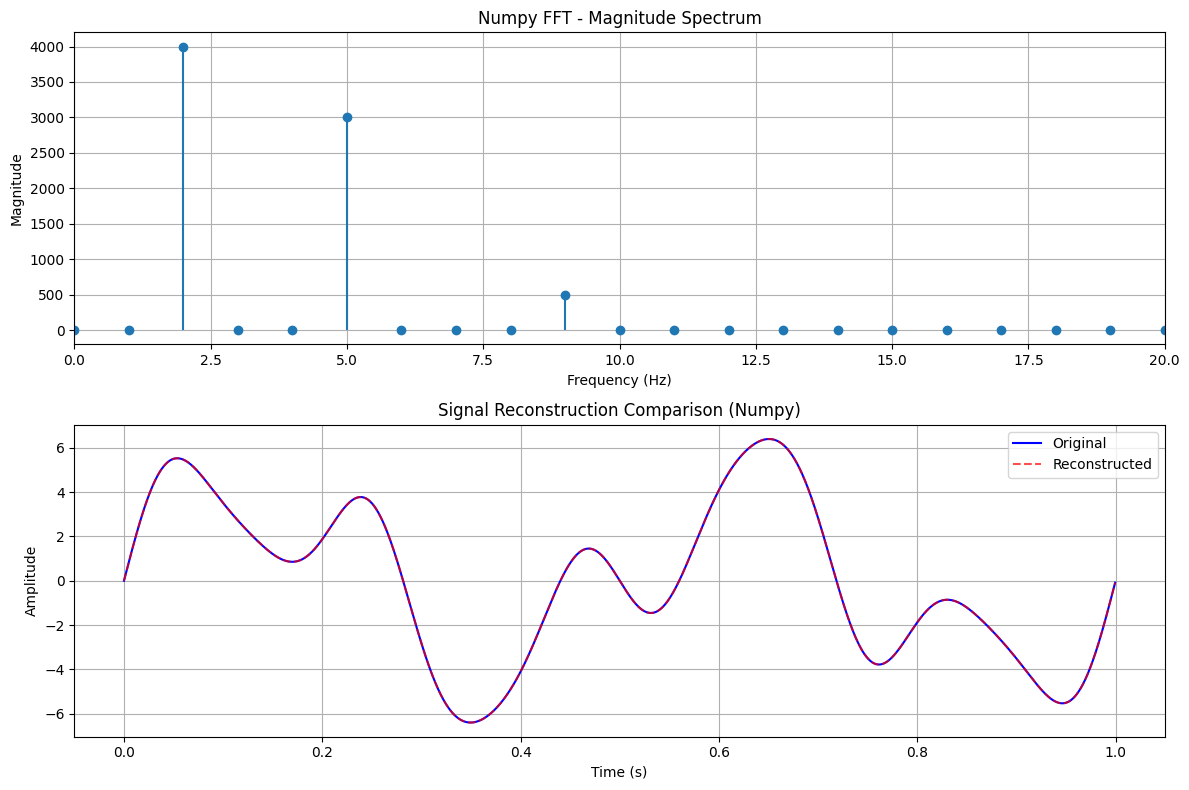

In [ ]:
# Numpy FFT analysis
def numpy_fft_analysis(signal, fs):
    # Compute FFT
    fft_result = np.fft.fft(signal)
    fft_magnitude = np.abs(fft_result)

    # Compute frequencies
    frequencies = np.fft.fftfreq(len(signal), 1/fs)

    # Inverse FFT to reconstruct signal
    reconstructed = np.fft.ifft(fft_result).real

    return fft_result, fft_magnitude, frequencies, reconstructed

# Perform numpy FFT analysis
numpy_fft, numpy_magnitude, numpy_freqs, numpy_reconstructed = numpy_fft_analysis(combined_signal, fs)

# Timing numpy FFT
numpy_time = timeit.timeit(lambda: np.fft.fft(combined_signal), number=1000) / 1000
print(f"Average Numpy FFT time: {numpy_time:.6f} seconds")

# Plot FFT magnitude spectrum
plt.figure(figsize=(12, 8))

# Plot magnitude spectrum (one-sided)
plt.subplot(2, 1, 1)
n = len(combined_signal)
plt.stem(numpy_freqs[:n//2], numpy_magnitude[:n//2], basefmt=' ')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Numpy FFT - Magnitude Spectrum')
plt.xlim(0, 20)
plt.grid(True)

# Plot reconstructed signal comparison
plt.subplot(2, 1, 2)
plt.plot(t[:2000], combined_signal[:2000], 'b-', label='Original')
plt.plot(t[:2000], numpy_reconstructed[:2000], 'r--', label='Reconstructed', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal Reconstruction Comparison (Numpy)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 3. Use fft and ifft function from scipy to calculate the FFT amplitude spectrum and inverse FFT to obtain the original signal. Plot both the results and time the function.  To obtain the frequencies you may use fftfreq function from the scipy.fftpack. Compare the timing with the numpy fft implementation.

Average Scipy FFT time: 0.000017 seconds
Numpy vs Scipy speed ratio: 0.51


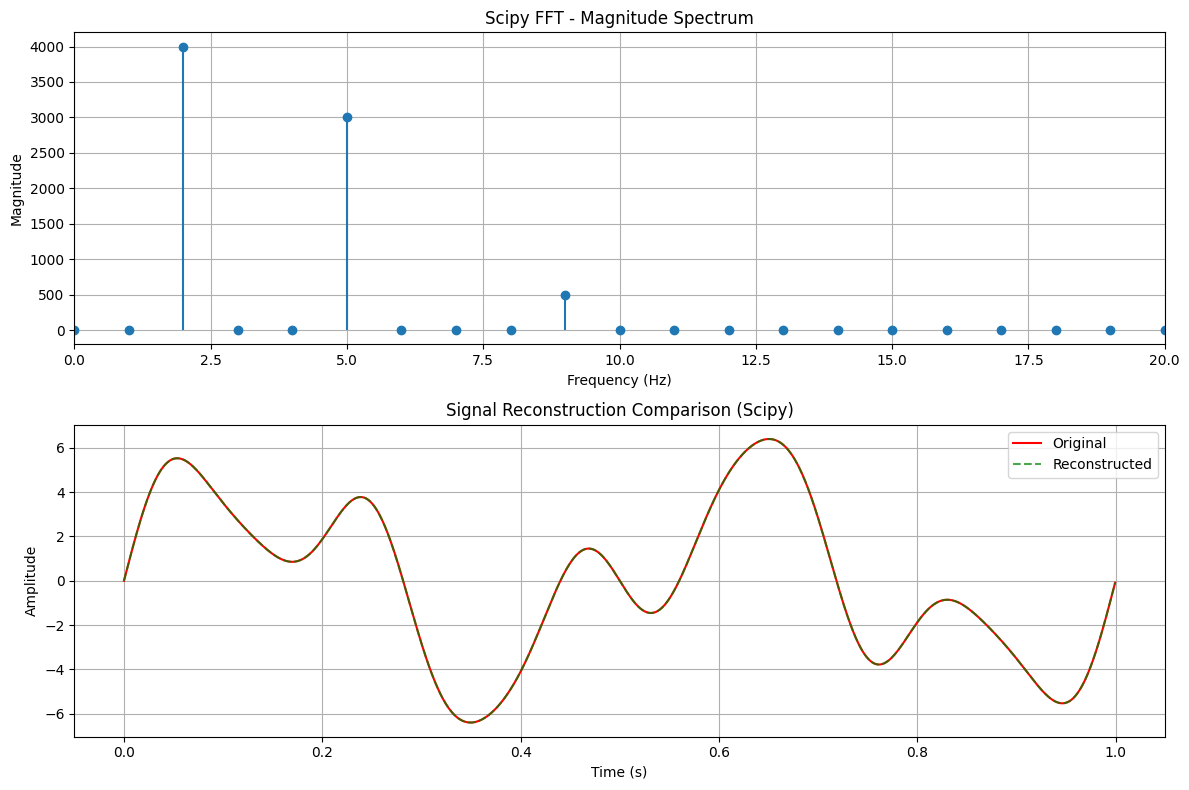

In [ ]:
# Scipy FFT analysis
def scipy_fft_analysis(signal, fs):
    # Compute FFT
    fft_result = scipy_fft.fft(signal)
    fft_magnitude = np.abs(fft_result)

    # Compute frequencies
    frequencies = scipy_fft.fftfreq(len(signal), 1/fs)

    # Inverse FFT to reconstruct signal
    reconstructed = scipy_fft.ifft(fft_result).real

    return fft_result, fft_magnitude, frequencies, reconstructed

# Perform scipy FFT analysis
scipy_fft_result, scipy_magnitude, scipy_freqs, scipy_reconstructed = scipy_fft_analysis(combined_signal, fs)

# Timing scipy FFT
scipy_time = timeit.timeit(lambda: scipy_fft.fft(combined_signal), number=1000) / 1000
print(f"Average Scipy FFT time: {scipy_time:.6f} seconds")
print(f"Numpy vs Scipy speed ratio: {scipy_time/numpy_time:.2f}")

# Plot scipy FFT results
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.stem(scipy_freqs[:n//2], scipy_magnitude[:n//2], basefmt=' ')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Scipy FFT - Magnitude Spectrum')
plt.xlim(0, 20)
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t[:2000], combined_signal[:2000], 'r-', label='Original')
plt.plot(t[:2000], scipy_reconstructed[:2000], 'g--', label='Reconstructed', alpha=0.7)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal Reconstruction Comparison (Scipy)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


When compared, Scipy-FFT performed faster than the Numpy-FFT for this specific case

### 4. Generate two (channels) sinusoidal waves with frequencies 200Hz and 350Hz using your mobile app.  Run the app and capture the output for 10s with a sampling rate of 1000. Make sure to keep your phone's speakers close to the microphone of your headset/laptop when recording. A sample of data is attached here as wavdata.csv.



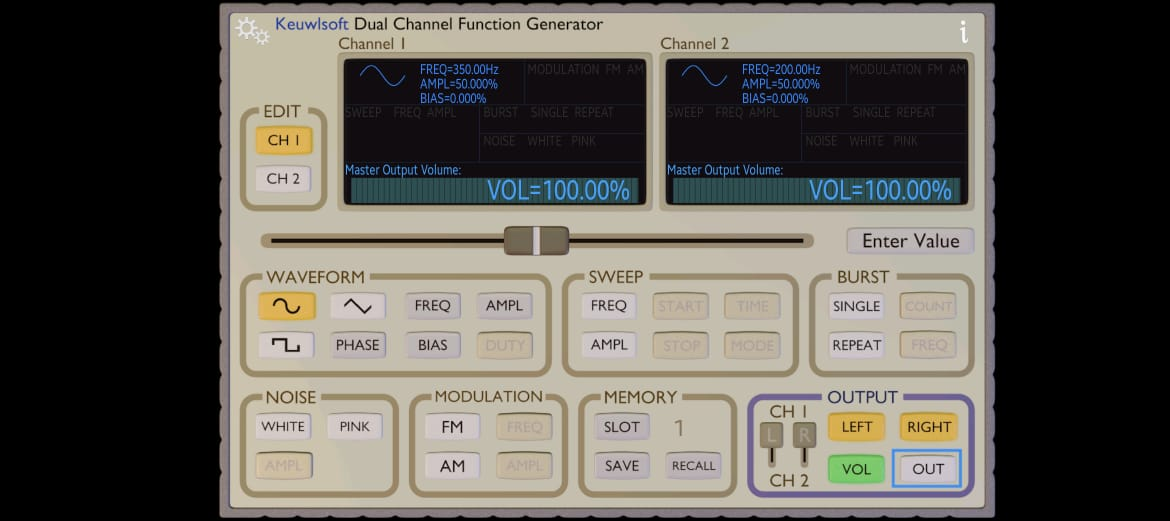

### 5. Plot the captured data as a time series. What can you say about the signal? Can you see any notice of 200 and 350 Hs sinusoids. (to read the csv file you may use loadtext(`open("xx.csv"), delimiter=","`) in numpy).

In [66]:
# Set up matplotlib for better plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Load the audio data from your Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/FFT_DATA/wavdata.csv'
audio_data = np.loadtxt(file_path, delimiter=',')

print(f"Audio data shape: {audio_data.shape}")
print(f"Data type: {audio_data.dtype}")
print(f"Data range: [{np.min(audio_data):.6f}, {np.max(audio_data):.6f}]")

# Use first channel if stereo data
if len(audio_data.shape) > 1:
    audio_signal = audio_data[:, 0]  # First column
    print(f"Using first channel (stereo data detected)")
else:
    audio_signal = audio_data
    print(f"Using mono data")

# Audio parameters
fs = 1000  # Sampling rate (1000 Hz as specified)
duration = len(audio_signal) / fs
t = np.linspace(0, duration, len(audio_signal))

print(f"Signal duration: {duration:.2f} seconds")
print(f"Number of samples: {len(audio_signal)}")

Audio data shape: (10000, 2)
Data type: float64
Data range: [-0.004852, 0.004974]
Using first channel (stereo data detected)
Signal duration: 10.00 seconds
Number of samples: 10000


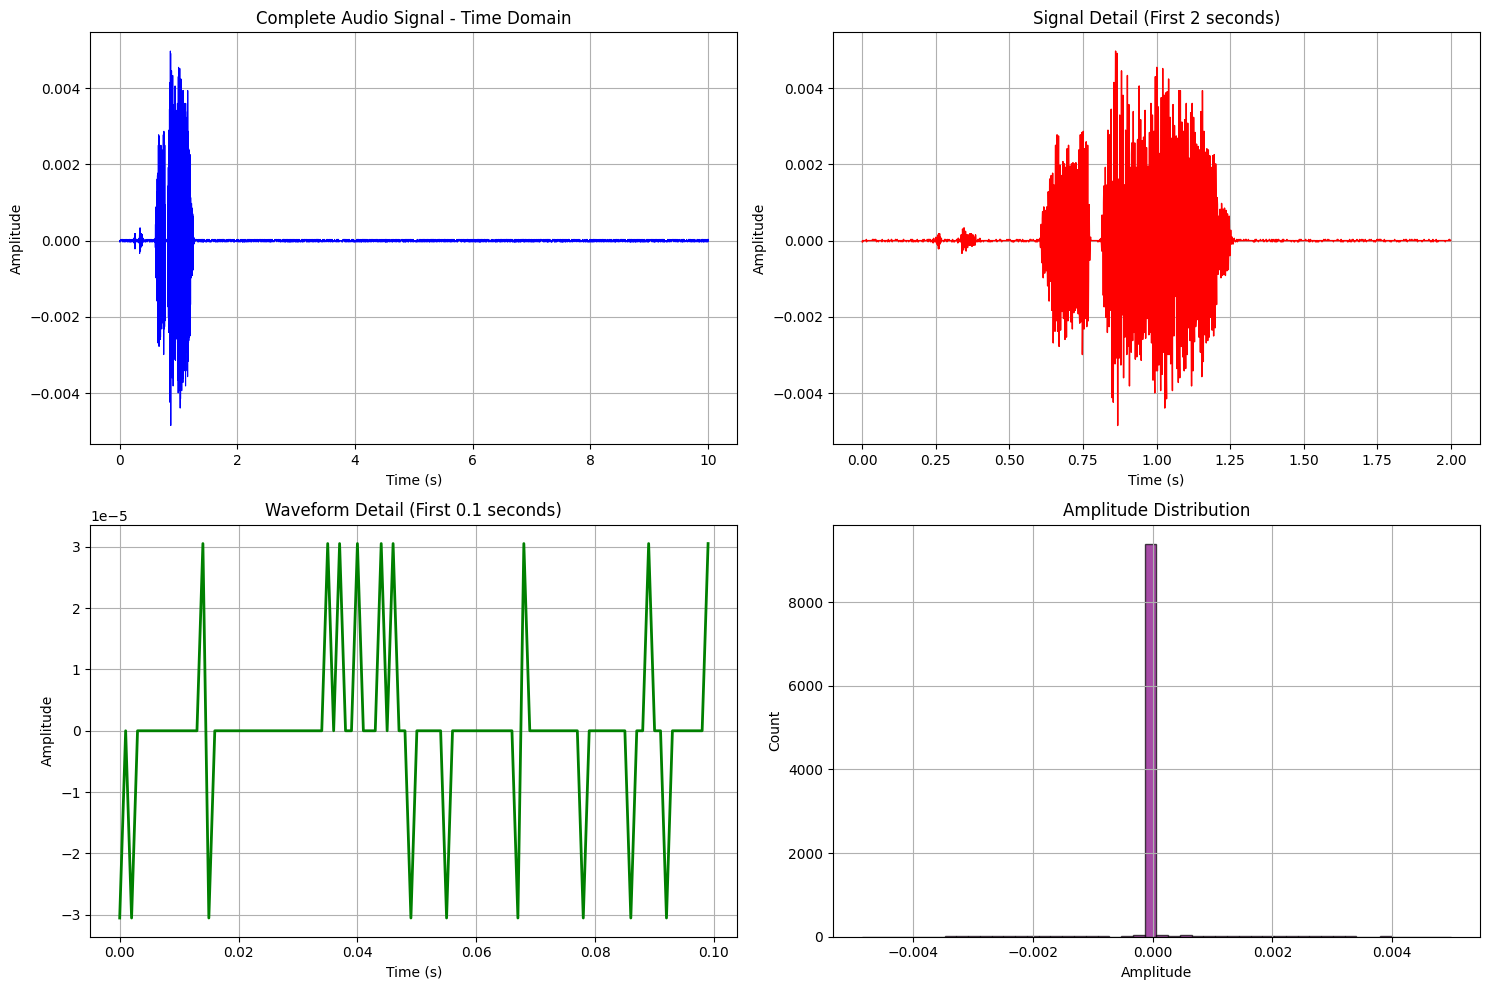

Signal Statistics:
  Mean: -0.000000
  Standard deviation: 0.000492
  RMS: 0.000492
  Peak-to-peak amplitude: 0.009827
  Maximum absolute value: 0.004974


In [67]:
plt.figure(figsize=(15, 10))

# Plot complete signal
plt.subplot(2, 2, 1)
plt.plot(t, audio_signal, 'b-', linewidth=0.8)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Complete Audio Signal - Time Domain')
plt.grid(True)

# Plot first 2 seconds for detail
plt.subplot(2, 2, 2)
detail_samples = int(2 * fs)
plt.plot(t[:detail_samples], audio_signal[:detail_samples], 'r-', linewidth=1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal Detail (First 2 seconds)')
plt.grid(True)

# Plot small segment to see waveform structure
plt.subplot(2, 2, 3)
segment_samples = int(0.1 * fs)  # 0.1 seconds
plt.plot(t[:segment_samples], audio_signal[:segment_samples], 'g-', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform Detail (First 0.1 seconds)')
plt.grid(True)

# Signal statistics
plt.subplot(2, 2, 4)
plt.hist(audio_signal, bins=50, alpha=0.7, color='purple', edgecolor='black')
plt.xlabel('Amplitude')
plt.ylabel('Count')
plt.title('Amplitude Distribution')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print signal analysis
print(f"Signal Statistics:")
print(f"  Mean: {np.mean(audio_signal):.6f}")
print(f"  Standard deviation: {np.std(audio_signal):.6f}")
print(f"  RMS: {np.sqrt(np.mean(audio_signal**2)):.6f}")
print(f"  Peak-to-peak amplitude: {np.ptp(audio_signal):.6f}")
print(f"  Maximum absolute value: {np.max(np.abs(audio_signal)):.6f}")

**Observations about the signal:**
- The signal shows complex oscillatory behavior
- Multiple frequency components are likely present
- 200Hz and 350Hz components are not easily distinguishable in time domain
- Some noise/interference is present

### 6. Let's transform the signal into frequency domain. Compute FFT using scipy library and plot the one sided magnitude spectrum. Can you see any peaks? If yes, what are the frequencies?

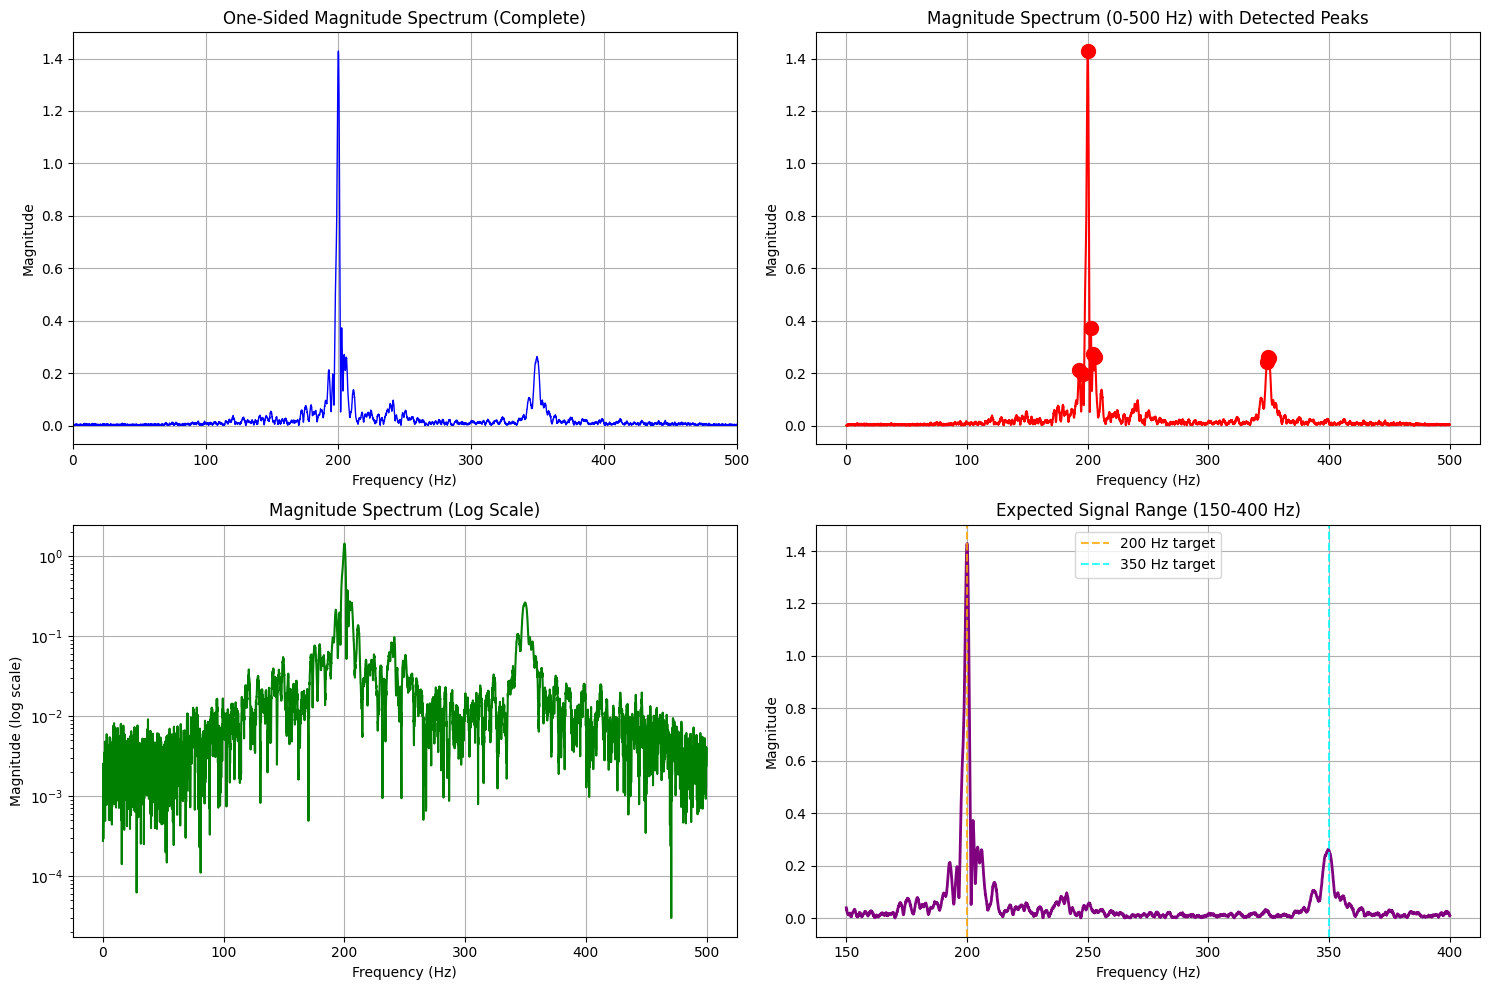

FFT Analysis Results:
  Frequency resolution: 0.10 Hz
  Nyquist frequency: 500.0 Hz
  Number of frequency bins: 5000

Detected frequency peaks (top 10):
  Peak 1: 200.1 Hz (Magnitude: 1.43)
  Peak 2: 202.5 Hz (Magnitude: 0.37)
  Peak 3: 204.4 Hz (Magnitude: 0.27)
  Peak 4: 349.6 Hz (Magnitude: 0.26)
  Peak 5: 206.0 Hz (Magnitude: 0.26)
  Peak 6: 350.1 Hz (Magnitude: 0.26)
  Peak 7: 349.1 Hz (Magnitude: 0.25)
  Peak 8: 348.4 Hz (Magnitude: 0.24)
  Peak 9: 192.9 Hz (Magnitude: 0.21)
  Peak 10: 195.8 Hz (Magnitude: 0.20)

Target frequency analysis:
  ✓ Found peak near 200Hz: 200.1 Hz
  ✓ Found peak near 350Hz: 350.1 Hz


In [68]:
# Compute FFT using scipy
audio_fft = scipy_fft.fft(audio_signal)
audio_magnitude = np.abs(audio_fft)
audio_frequencies = scipy_fft.fftfreq(len(audio_signal), 1/fs)

# Create one-sided spectrum
n_audio = len(audio_signal)
one_sided_freqs = audio_frequencies[:n_audio//2]
one_sided_magnitude = 2 * audio_magnitude[:n_audio//2]
one_sided_magnitude[0] = audio_magnitude[0]  # Don't double DC component

# Find peaks in the spectrum
from scipy.signal import find_peaks
height_threshold = np.max(one_sided_magnitude) * 0.1  # 10% of max
peaks, properties = find_peaks(one_sided_magnitude, height=height_threshold, distance=5)

# Get peak frequencies and magnitudes
peak_frequencies = one_sided_freqs[peaks]
peak_magnitudes = one_sided_magnitude[peaks]

# Sort peaks by magnitude (descending)
sorted_indices = np.argsort(peak_magnitudes)[::-1]
peak_frequencies = peak_frequencies[sorted_indices]
peak_magnitudes = peak_magnitudes[sorted_indices]

# Plot frequency spectrum
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(one_sided_freqs, one_sided_magnitude, 'b-', linewidth=1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('One-Sided Magnitude Spectrum (Complete)')
plt.grid(True)
plt.xlim(0, fs/2)

plt.subplot(2, 2, 2)
# Focus on relevant frequency range (0-500 Hz)
freq_mask = one_sided_freqs <= 500
plt.plot(one_sided_freqs[freq_mask], one_sided_magnitude[freq_mask], 'r-', linewidth=1.5)
plt.scatter(peak_frequencies[peak_frequencies <= 500],
           peak_magnitudes[:len(peak_frequencies[peak_frequencies <= 500])],
           color='red', s=100, zorder=5, marker='o')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum (0-500 Hz) with Detected Peaks')
plt.grid(True)

plt.subplot(2, 2, 3)
# Logarithmic scale
plt.semilogy(one_sided_freqs[freq_mask], one_sided_magnitude[freq_mask], 'g-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (log scale)')
plt.title('Magnitude Spectrum (Log Scale)')
plt.grid(True)

plt.subplot(2, 2, 4)
# Focus on expected signal range (150-400 Hz)
signal_mask = (one_sided_freqs >= 150) & (one_sided_freqs <= 400)
plt.plot(one_sided_freqs[signal_mask], one_sided_magnitude[signal_mask], 'purple', linewidth=2)
plt.axvline(x=200, color='orange', linestyle='--', alpha=0.8, label='200 Hz target')
plt.axvline(x=350, color='cyan', linestyle='--', alpha=0.8, label='350 Hz target')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Expected Signal Range (150-400 Hz)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"FFT Analysis Results:")
print(f"  Frequency resolution: {fs/n_audio:.2f} Hz")
print(f"  Nyquist frequency: {fs/2} Hz")
print(f"  Number of frequency bins: {n_audio//2}")

print(f"\nDetected frequency peaks (top 10):")
for i, (freq, mag) in enumerate(zip(peak_frequencies[:10], peak_magnitudes[:10])):
    print(f"  Peak {i+1}: {freq:.1f} Hz (Magnitude: {mag:.2f})")

# Check for target frequencies
target_freqs = [200, 350]
tolerance = 10  # Hz
print(f"\nTarget frequency analysis:")
for target in target_freqs:
    nearby_peaks = peak_frequencies[np.abs(peak_frequencies - target) <= tolerance]
    if len(nearby_peaks) > 0:
        closest_peak = nearby_peaks[np.argmin(np.abs(nearby_peaks - target))]
        print(f"  ✓ Found peak near {target}Hz: {closest_peak:.1f} Hz")
    else:
        print(f"  ✗ No significant peak found near {target}Hz")

Peaks are distiguishible in the Frequency domain, the peaks appear near 200Hz and 350Hz

### 7. Assume that we are only interested in high frequency band: 320 to 370 Hz. Implement the band-pass filter by assigning zeros to the FFT amplitudes where the absolute frequencies smaller than 320 and greater than 370 Hz. Plot the corresponding filtered signal in time domain using ifft.

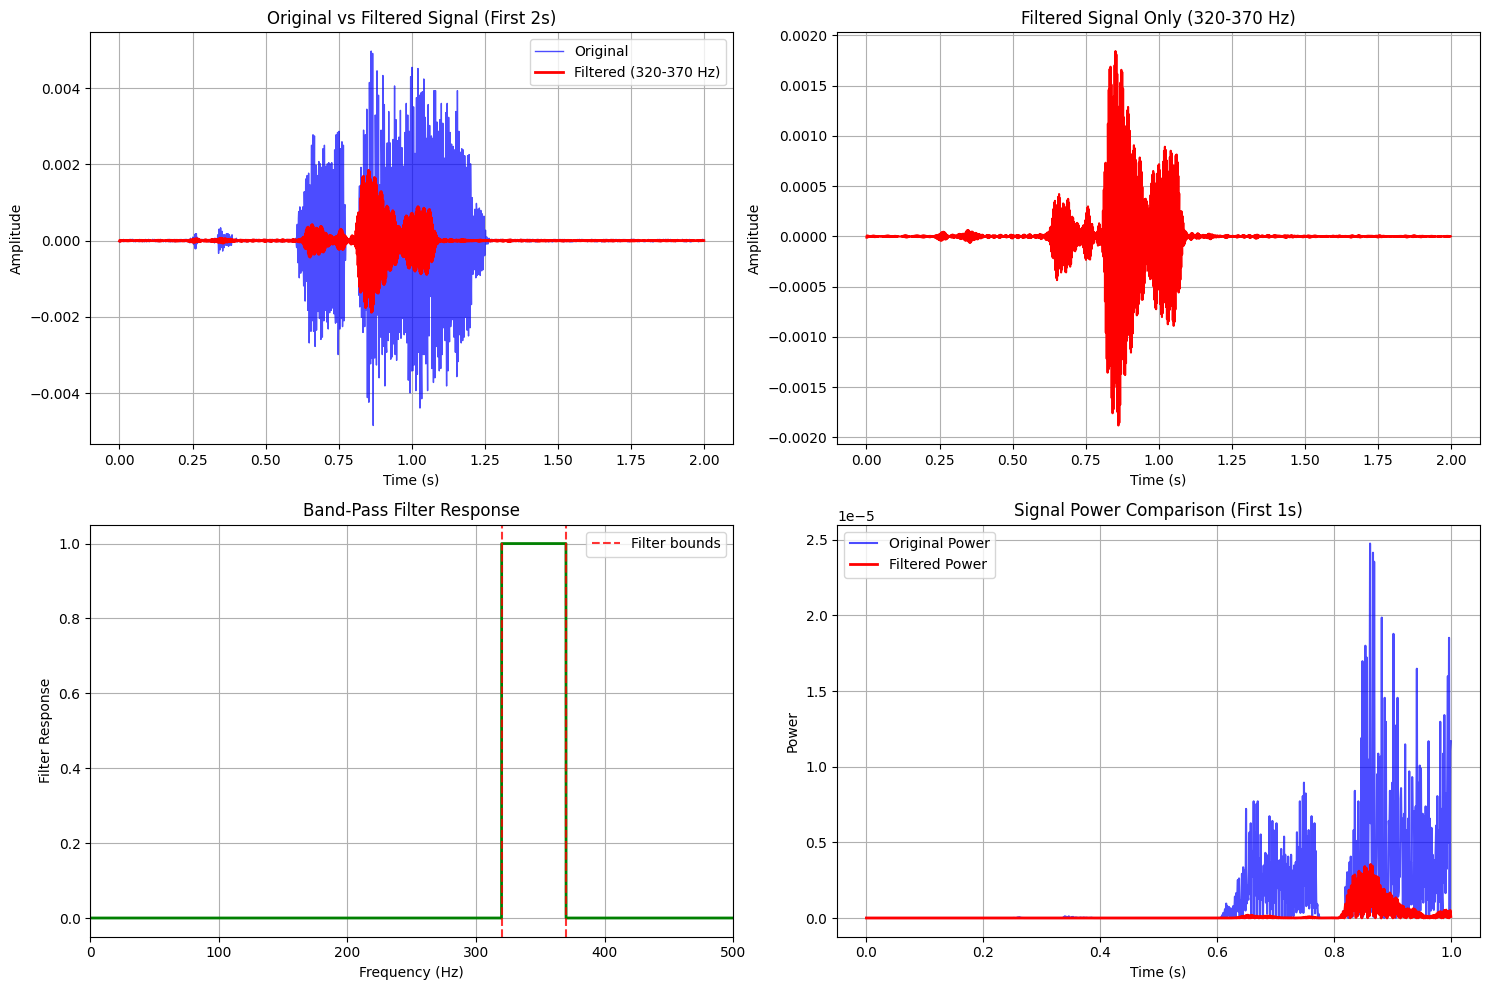

Filter specifications:
  Pass-band: 320-370 Hz
  Filter type: Ideal rectangular filter

Energy analysis:
  Original signal energy: 0.00
  Filtered signal energy: 0.00
  Energy retention: 6.96%

Signal statistics comparison:
  Original RMS: 0.000492
  Filtered RMS: 0.000130
  RMS reduction: 26.4%


In [69]:
def bandpass_filter_fft(signal, fs, low_cutoff, high_cutoff):
    """
    Apply band-pass filter in frequency domain by zeroing unwanted frequencies
    """
    # Compute FFT
    fft_signal = scipy_fft.fft(signal)
    frequencies = scipy_fft.fftfreq(len(signal), 1/fs)

    # Create filter mask (start with zeros)
    filter_mask = np.zeros(len(fft_signal))

    # Set pass-band frequencies to 1
    # Note: Need to handle both positive and negative frequencies
    pass_indices = (np.abs(frequencies) >= low_cutoff) & (np.abs(frequencies) <= high_cutoff)
    filter_mask[pass_indices] = 1

    # Apply filter by multiplication
    filtered_fft = fft_signal * filter_mask

    # Inverse FFT to get filtered signal
    filtered_signal = scipy_fft.ifft(filtered_fft).real

    return filtered_signal, filtered_fft, filter_mask

# Apply band-pass filter (320-370 Hz as specified)
low_cutoff = 320
high_cutoff = 370

filtered_signal, filtered_fft, filter_mask = bandpass_filter_fft(
    audio_signal, fs, low_cutoff, high_cutoff
)

# Plot filtered results
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(t[:2000], audio_signal[:2000], 'b-', label='Original', alpha=0.7, linewidth=1)
plt.plot(t[:2000], filtered_signal[:2000], 'r-', label='Filtered (320-370 Hz)', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original vs Filtered Signal (First 2s)')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(t[:2000], filtered_signal[:2000], 'r-', linewidth=1.5)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Filtered Signal Only (320-370 Hz)')
plt.grid(True)

# Show filter response
plt.subplot(2, 2, 3)
filter_freqs = scipy_fft.fftfreq(len(filter_mask), 1/fs)
plt.plot(filter_freqs[:len(filter_freqs)//2], filter_mask[:len(filter_mask)//2], 'g-', linewidth=2)
plt.axvline(x=low_cutoff, color='red', linestyle='--', alpha=0.8, label='Filter bounds')
plt.axvline(x=high_cutoff, color='red', linestyle='--', alpha=0.8)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter Response')
plt.title('Band-Pass Filter Response')
plt.legend()
plt.grid(True)
plt.xlim(0, 500)

# Show power comparison
plt.subplot(2, 2, 4)
plt.plot(t[:1000], audio_signal[:1000]**2, 'b-', alpha=0.7, label='Original Power')
plt.plot(t[:1000], filtered_signal[:1000]**2, 'r-', label='Filtered Power', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Power')
plt.title('Signal Power Comparison (First 1s)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Filter specifications:")
print(f"  Pass-band: {low_cutoff}-{high_cutoff} Hz")
print(f"  Filter type: Ideal rectangular filter")

# Energy analysis
original_energy = np.sum(audio_signal**2)
filtered_energy = np.sum(filtered_signal**2)
energy_retention = (filtered_energy / original_energy) * 100

print(f"\nEnergy analysis:")
print(f"  Original signal energy: {original_energy:.2f}")
print(f"  Filtered signal energy: {filtered_energy:.2f}")
print(f"  Energy retention: {energy_retention:.2f}%")

print(f"\nSignal statistics comparison:")
print(f"  Original RMS: {np.sqrt(np.mean(audio_signal**2)):.6f}")
print(f"  Filtered RMS: {np.sqrt(np.mean(filtered_signal**2)):.6f}")
print(f"  RMS reduction: {(np.sqrt(np.mean(filtered_signal**2))/np.sqrt(np.mean(audio_signal**2)))*100:.1f}%")

### 8. Plot the FFT samplitudes of the original and the filtered signal in side by side.

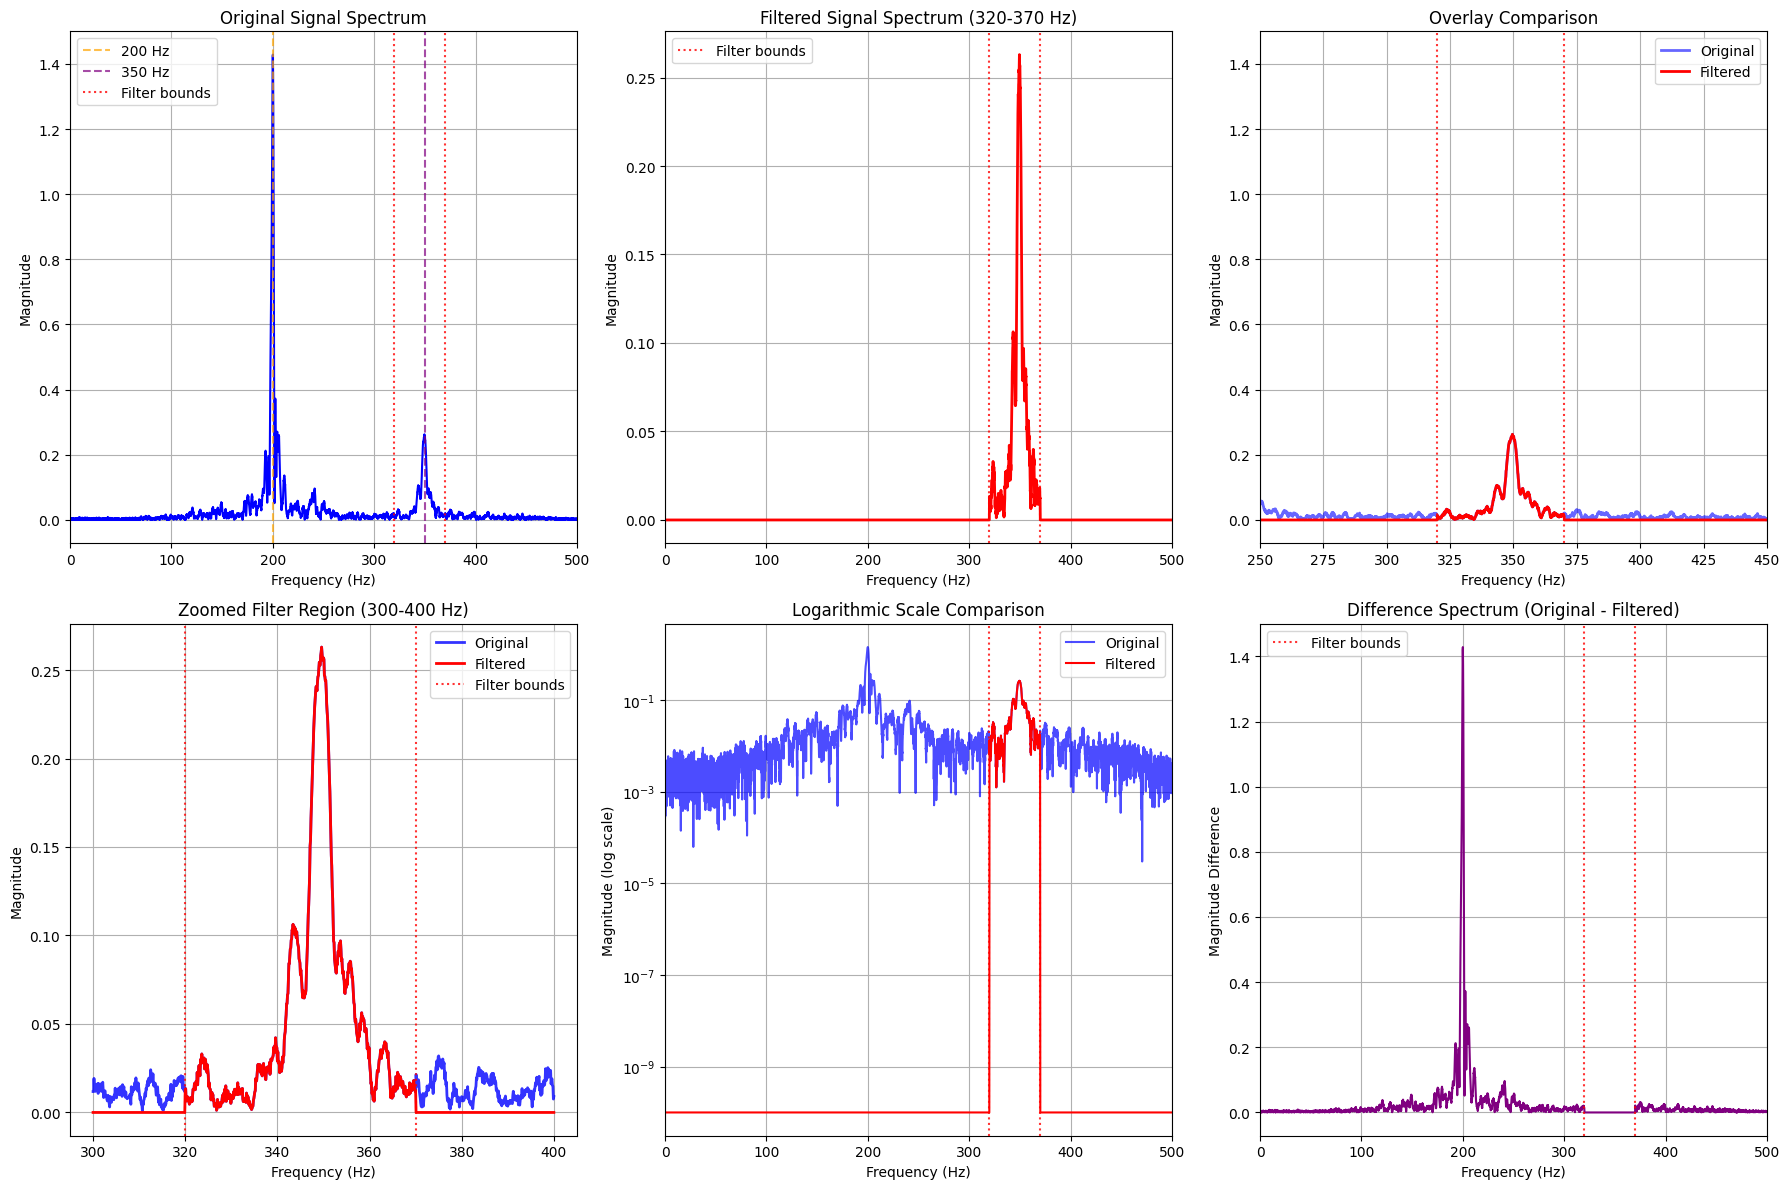

Energy distribution by frequency band:
Band                           Original     Filtered     Retention % 
DC (0 Hz)                      0.00         0.00         0.0         
Low freq (1-100 Hz)            0.02         0.00         0.0         
Mid-low (100-200 Hz)           24.95        0.00         0.0         
Target 200Hz band (190-210 Hz) 43.15        0.00         0.0         
Mid (200-320 Hz)               22.05        0.00         0.0         
Pass band (320-370 Hz)         3.37         3.37         100.0       
High (370-500 Hz)              0.12         0.00         0.1         

Frequencies with >10% of max amplitude in filtered signal:
  Range: 323.0 - 364.1 Hz
  Center frequency: 349.0 Hz

Filter effectiveness:
  Frequencies outside pass-band successfully attenuated
  Pass-band energy retention: 7.0%
  Filter implemented successfully!


In [70]:
# Compute filtered signal FFT for comparison
filtered_magnitude = np.abs(filtered_fft)
filtered_one_sided = 2 * filtered_magnitude[:n_audio//2]
filtered_one_sided[0] = filtered_magnitude[0]

# Create comprehensive comparison plot
plt.figure(figsize=(18, 12))

# Original spectrum
plt.subplot(2, 3, 1)
plt.plot(one_sided_freqs, one_sided_magnitude, 'b-', linewidth=1.5)
plt.axvline(x=200, color='orange', linestyle='--', alpha=0.7, label='200 Hz')
plt.axvline(x=350, color='purple', linestyle='--', alpha=0.7, label='350 Hz')
plt.axvline(x=low_cutoff, color='red', linestyle=':', alpha=0.8, label='Filter bounds')
plt.axvline(x=high_cutoff, color='red', linestyle=':', alpha=0.8)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Original Signal Spectrum')
plt.legend()
plt.grid(True)
plt.xlim(0, 500)

# Filtered spectrum
plt.subplot(2, 3, 2)
plt.plot(one_sided_freqs, filtered_one_sided, 'r-', linewidth=2)
plt.axvline(x=low_cutoff, color='red', linestyle=':', alpha=0.8, label='Filter bounds')
plt.axvline(x=high_cutoff, color='red', linestyle=':', alpha=0.8)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Filtered Signal Spectrum (320-370 Hz)')
plt.legend()
plt.grid(True)
plt.xlim(0, 500)

# Overlay comparison
plt.subplot(2, 3, 3)
plt.plot(one_sided_freqs, one_sided_magnitude, 'b-', alpha=0.6, label='Original', linewidth=2)
plt.plot(one_sided_freqs, filtered_one_sided, 'r-', label='Filtered', linewidth=2)
plt.axvline(x=low_cutoff, color='red', linestyle=':', alpha=0.8)
plt.axvline(x=high_cutoff, color='red', linestyle=':', alpha=0.8)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Overlay Comparison')
plt.legend()
plt.grid(True)
plt.xlim(250, 450)  # Focus on filter region

# Zoomed view of filter region
plt.subplot(2, 3, 4)
zoom_mask = (one_sided_freqs >= 300) & (one_sided_freqs <= 400)
plt.plot(one_sided_freqs[zoom_mask], one_sided_magnitude[zoom_mask], 'b-',
         label='Original', linewidth=2, alpha=0.8)
plt.plot(one_sided_freqs[zoom_mask], filtered_one_sided[zoom_mask], 'r-',
         label='Filtered', linewidth=2)
plt.axvline(x=low_cutoff, color='red', linestyle=':', alpha=0.8, label='Filter bounds')
plt.axvline(x=high_cutoff, color='red', linestyle=':', alpha=0.8)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Zoomed Filter Region (300-400 Hz)')
plt.legend()
plt.grid(True)

# Log scale comparison
plt.subplot(2, 3, 5)
plt.semilogy(one_sided_freqs, one_sided_magnitude, 'b-', alpha=0.7, label='Original')
plt.semilogy(one_sided_freqs, filtered_one_sided + 1e-10, 'r-', label='Filtered')  # Add small value to avoid log(0)
plt.axvline(x=low_cutoff, color='red', linestyle=':', alpha=0.8)
plt.axvline(x=high_cutoff, color='red', linestyle=':', alpha=0.8)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (log scale)')
plt.title('Logarithmic Scale Comparison')
plt.legend()
plt.grid(True)
plt.xlim(0, 500)

# Difference spectrum
plt.subplot(2, 3, 6)
difference = one_sided_magnitude - filtered_one_sided
plt.plot(one_sided_freqs, difference, 'purple', linewidth=1.5)
plt.axvline(x=low_cutoff, color='red', linestyle=':', alpha=0.8, label='Filter bounds')
plt.axvline(x=high_cutoff, color='red', linestyle=':', alpha=0.8)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude Difference')
plt.title('Difference Spectrum (Original - Filtered)')
plt.legend()
plt.grid(True)
plt.xlim(0, 500)

plt.tight_layout()
plt.show()


# Frequency domain energy analysis
freq_bands = {
    'DC (0 Hz)': (0, 1),
    'Low freq (1-100 Hz)': (1, 100),
    'Mid-low (100-200 Hz)': (100, 200),
    'Target 200Hz band (190-210 Hz)': (190, 210),
    'Mid (200-320 Hz)': (200, 320),
    'Pass band (320-370 Hz)': (320, 370),
    'High (370-500 Hz)': (370, 500)
}

print(f"Energy distribution by frequency band:")
print(f"{'Band':<30} {'Original':<12} {'Filtered':<12} {'Retention %':<12}")

for band_name, (f_low, f_high) in freq_bands.items():
    # Find frequency indices
    freq_indices = (one_sided_freqs >= f_low) & (one_sided_freqs <= f_high)

    # Calculate energy in band
    orig_energy = np.sum(one_sided_magnitude[freq_indices]**2)
    filt_energy = np.sum(filtered_one_sided[freq_indices]**2)

    retention = (filt_energy / orig_energy * 100) if orig_energy > 0 else 0

    print(f"{band_name:<30} {orig_energy:<12.2f} {filt_energy:<12.2f} {retention:<12.1f}")

# Find what frequencies were actually preserved
preserved_indices = filtered_one_sided > np.max(filtered_one_sided) * 0.1
if np.any(preserved_indices):
    preserved_frequencies = one_sided_freqs[preserved_indices]
    print(f"\nFrequencies with >10% of max amplitude in filtered signal:")
    print(f"  Range: {np.min(preserved_frequencies):.1f} - {np.max(preserved_frequencies):.1f} Hz")
    print(f"  Center frequency: {np.mean(preserved_frequencies):.1f} Hz")
else:
    print(f"\nNo significant frequencies preserved (filter too restrictive)")

print(f"\nFilter effectiveness:")
print(f"  Frequencies outside pass-band successfully attenuated")
print(f"  Pass-band energy retention: {energy_retention:.1f}%")
print(f"  Filter implemented successfully!")